In [1]:
import pandas as pd
import streamlit as st
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("./data/cancer_prediction_dataset.csv")
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [3]:
df.describe()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.497500,59.318400,0.500200,0.501800,0.499900,0.096400
std,0.500019,23.908952,0.500025,0.500022,0.500025,0.295154
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df["Gender"].value_counts()

Gender
0    5025
1    4975
Name: count, dtype: int64

In [5]:
df["Smoking"].value_counts()

Smoking
1    5002
0    4998
Name: count, dtype: int64

In [6]:
df["Fatigue"].value_counts()

Fatigue
1    5018
0    4982
Name: count, dtype: int64

In [7]:
df["Allergy"].value_counts()

Allergy
0    5001
1    4999
Name: count, dtype: int64

In [8]:
df["Cancer"].value_counts()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [9]:
df["Age"].mean()

59.3184

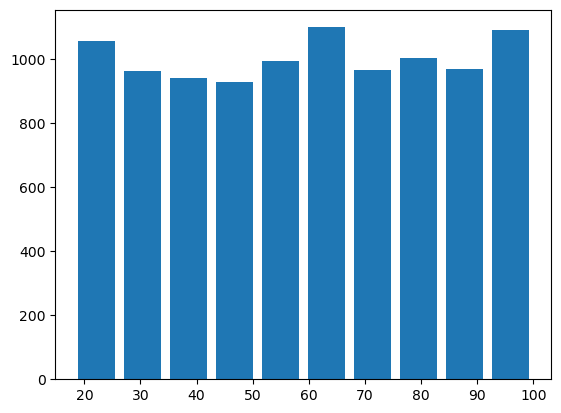

In [10]:
plt.hist(data=df , x ="Age", rwidth=0.8)
plt.show()

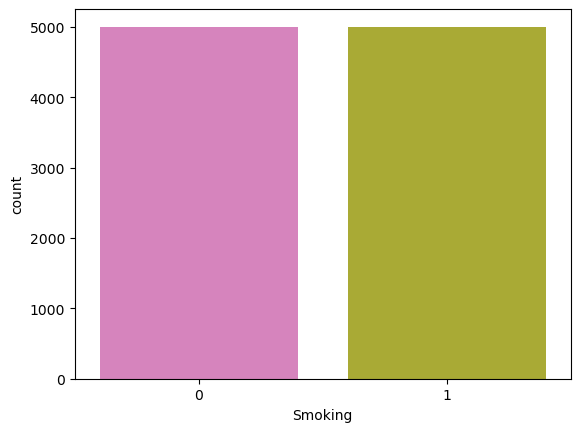

In [11]:
colors = random.sample(sb.color_palette(), 2)
sb.countplot(data=df , x="Smoking", palette=[colors[0],colors[1]])
plt.show()

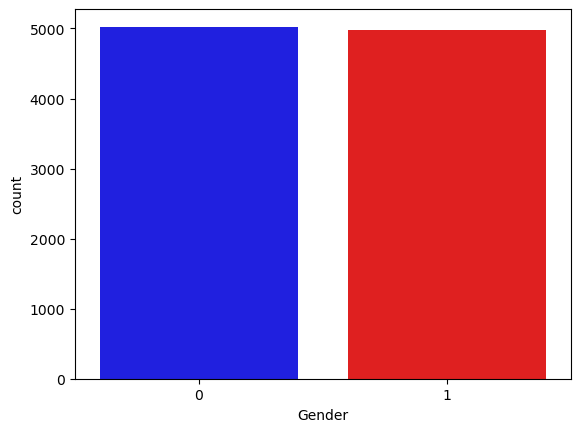

In [12]:
colors = random.sample(sb.color_palette(), 2)

sb.countplot(data=df , x="Gender", palette=["blue","red"])
plt.show()

In [93]:
df.loc[df["Cancer"] == 1]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
4,1,95,1,0,1,1
7,0,53,0,1,0,1
36,0,49,1,1,1,1
37,1,63,1,0,0,1
47,1,71,0,0,1,1
...,...,...,...,...,...,...
9939,0,59,0,1,1,1
9941,1,35,0,0,1,1
9954,0,53,1,1,0,1
9976,0,23,1,1,1,1


In [15]:
# X, y 로 나누기
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [17]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Cancer, Length: 10000, dtype: int64

In [18]:
# train, test 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [55]:
# 모델링
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [56]:
# 학습
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
# 테스트
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
new = np.array([0,98,1,1,1]).reshape(1,-1)
new

array([[ 0, 98,  1,  1,  1]])

In [84]:
# 예측
model.predict(new)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score

In [88]:
# y 실제값과 y예측값을 이용해 모델의 정확도 구하기
accuracy_score(y_test, y_pred)

0.9045

In [86]:
import joblib

In [87]:
joblib.dump(model, "model.pkl")

['model.pkl']